In [8]:
## Import Required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import nltk
from nltk import word_tokenize,sent_tokenize,TweetTokenizer,RegexpTokenizer



import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv('https://raw.githubusercontent.com/mohittomar2008/Malignant-Comments-Classifier-Project/main/train.csv')
test=pd.read_csv("https://raw.githubusercontent.com/mohittomar2008/Malignant-Comments-Classifier-Project/main/test.csv")

In [9]:
train.shape  , test.shape

((159571, 8), (153164, 2))

In [10]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [11]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [13]:
train.iloc[0,1]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [18]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [31]:
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [32]:
test.dtypes

id              object
comment_text    object
dtype: object

### Null Values

In [21]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [22]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

<AxesSubplot:>

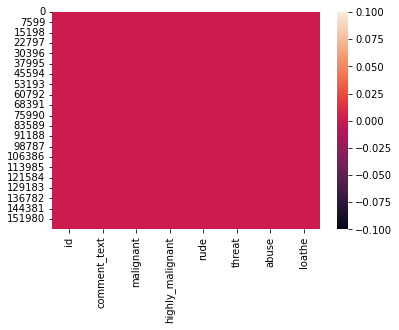

In [23]:
sns.heatmap(train.isnull())

## No Null vlaues present in train and test dataset

### Do we have any correlation within data

<AxesSubplot:>

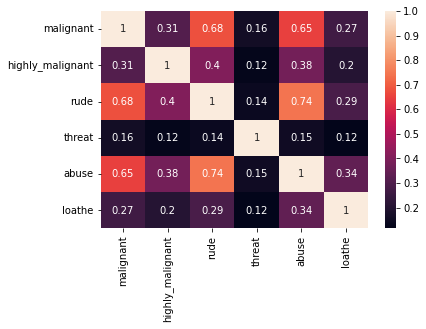

In [27]:
sns.heatmap(train.corr(),annot=True,linecolor='white')

In [30]:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

In [34]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [35]:
## Lets jumple tha train dataset first

train=train.reindex(np.random.permutation(train.index))

In [40]:
# Read the target features

train['malignant'].value_counts(normalize=True)

0    0.904156
1    0.095844
Name: malignant, dtype: float64

MALIGNANT
0    0.904156
1    0.095844
Name: malignant, dtype: float64


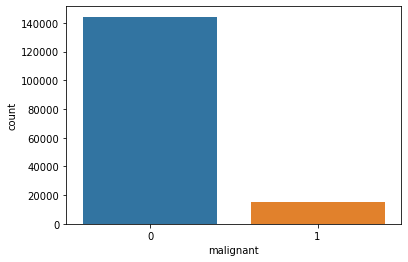

************************************************** 

**************************************************
HIGHLY_MALIGNANT
0    0.990004
1    0.009996
Name: highly_malignant, dtype: float64


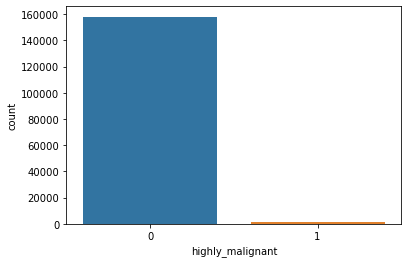

************************************************** 

**************************************************
RUDE
0    0.947052
1    0.052948
Name: rude, dtype: float64


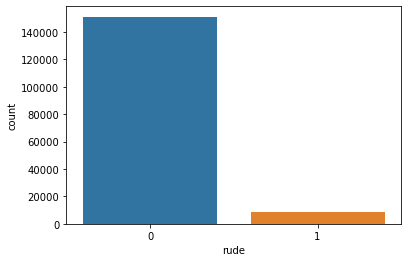

************************************************** 

**************************************************
THREAT
0    0.997004
1    0.002996
Name: threat, dtype: float64


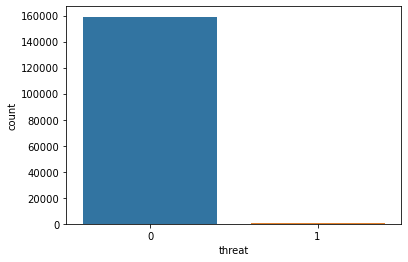

************************************************** 

**************************************************
ABUSE
0    0.950636
1    0.049364
Name: abuse, dtype: float64


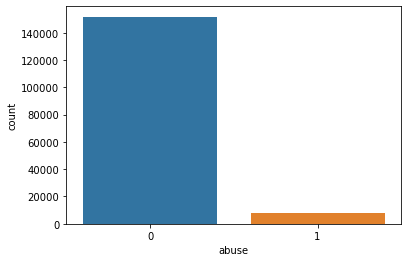

************************************************** 

**************************************************
LOATHE
0    0.991195
1    0.008805
Name: loathe, dtype: float64


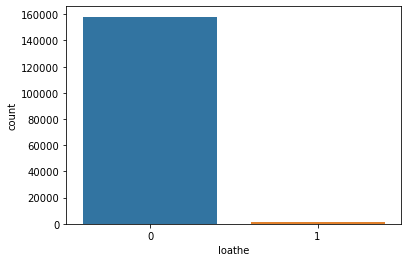

************************************************** 

**************************************************


In [56]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

for i in column:
    print(i.upper())
    print(train[i].value_counts(normalize=True))
    sns.countplot(train[i])
    plt.xlabel(i)
    plt.show()
    print('*'*50,'\n')
    print('*'*50)
   

In [57]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

train['malignant'].sum()

15294

In [78]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

train[column].sum().to_frame(name='count').sort_values(by='count', ascending=False)


,count
malignant,15294
rude,8449
abuse,7877
highly_malignant,1595
loathe,1405
threat,478


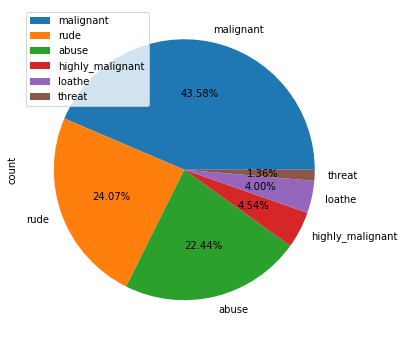

In [99]:
train[column].sum().to_frame(name='count').sort_values(by='count', ascending=False).plot.pie(y='count',autopct='%1.2f%%',figsize=(6,6)).legend(loc='upper left')

In [100]:
train['comment_text']

77973    why is this communist 50 Cent Party member Jsj...
65077    I don't think so AI009, you don't read facts, ...
96617    It has been proven that no perfect Golomb rule...
27819    Urgent \n\n  Excuse me \n   My friend, Bdyz wa...
49487    Wow! I see you are a lawyer. What kind of half...
                               ...                        
38420    "\n\nFirst of all, I never ""ordered"" anyone....
59157    Uw-delete1 template \n\nHave you seen that thi...
80049    "\n\nIf the ""major algorithm"" you are referr...
29957    "\n\n(outdent) Wow, another newbie behaving li...
8672     When you say that you have discovered that thi...
Name: comment_text, Length: 159571, dtype: object

In [102]:
# Length of comment

train['length']=train['comment_text'].str.len()

In [103]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
77973,d0c230d32f2a9f03,why is this communist 50 Cent Party member Jsj...,0,0,0,0,0,0,449
65077,ae1beb489a0525a5,"I don't think so AI009, you don't read facts, ...",0,0,0,0,0,0,184
96617,04c3c88b210cb6c0,It has been proven that no perfect Golomb rule...,0,0,0,0,0,0,152
27819,49a3f0d2109e91b4,"Urgent \n\n Excuse me \n My friend, Bdyz wa...",0,0,0,0,0,0,141
49487,845112d2d2c9743c,Wow! I see you are a lawyer. What kind of half...,1,0,0,0,0,0,113
